# Introduction

In this project I will investigate a dataset named 'Medical Appointment No Shows'
This dataset contains information from 100k medical appointments in Brazil in the 2015 and 2016, the main aspect in this dataset is if a patient show up for its appointment or not.

#### Questions:
    

The main question in this investigation is : What factors are important for us to know in order to predict if a     patient will show up for their scheduled appointment

importing packages

In [ ]:
conda install pandas numpy seaborn matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime 
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


## Data wrangling

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv',header=0, parse_dates=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The dimensions of the dataset

In [33]:
df.shape

(110527, 14)

#### Explore the dataset

In [34]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


I notice there is negative values in  the age 

In [35]:
#checking for missing value df.isnull().any()
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [36]:
#checking for duplicated rows
sum(df.duplicated())

0

fortunately there is no missing value and no duplicated row

#### Data cleaning

1- I'll convert the type of date columns 
2- So I will replace the negative age value by the average age
3- I'll clean the usless columns : PatientId and AppointmentID 
4- I'll rename the No-show column

In [59]:
import datetime
df[['ScheduledDay','AppointmentDay']] = df[['ScheduledDay','AppointmentDay']].astype('datetime64')
df['ScheduledDay'] = df['ScheduledDay'].dt.date.astype('datetime64')                        # To eliminate time
#df['ScheduledDay'] = df['ScheduledDay']
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show_up,time_delay,delay,Scheduled_month,Scheduled_year,Scheduled_day_of_week
0,F,2016-04-29,2016-04-29,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days,0,4,2016,Friday
1,M,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days,0,4,2016,Friday
2,F,2016-04-29,2016-04-29,62.0,MATA DA PRAIA,0,0,0,0,0,0,No,0 days,0,4,2016,Friday
3,F,2016-04-29,2016-04-29,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 days,0,4,2016,Friday
4,F,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No,0 days,0,4,2016,Friday


In [38]:
# replace negative age value by the mean age 
a = df.loc[df.Age <0,'Age'].values[:]
df.Age.replace(a,df.Age.mean(),inplace=True)
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.089219,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.109921,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [39]:
# Delete usless columns
df.drop(['PatientId','AppointmentID'],axis=1, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62.0,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No


In [40]:
# I replaced the '-' by '_' to facilitate the copy and past
df = df.rename(columns={"No-show": "No_show_up"})

# Investigate columns

#### During the investigation I'll make conditions for subsetting te show up part 'show' and the non show up part 'n_show' 

In [41]:
show = df['No_show_up'] == 'No'           # The show up 
n_show = df['No_show_up'] == 'Yes'        # The non show up
df[show].head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show_up
0,F,2016-04-29,2016-04-29,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62.0,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No


In [42]:
df[show].head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show_up
0,F,2016-04-29,2016-04-29,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62.0,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No


In [43]:
df[n_show].head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show_up
6,F,2016-04-27,2016-04-29,23.0,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,2016-04-27,2016-04-29,39.0,GOIABEIRAS,0,0,0,0,0,0,Yes
11,M,2016-04-26,2016-04-29,29.0,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,F,2016-04-28,2016-04-29,40.0,CONQUISTA,1,0,0,0,0,0,Yes
20,F,2016-04-27,2016-04-29,30.0,NOVA PALESTINA,0,0,0,0,0,0,Yes


#### Now, I'll make some functions  


The fisrt function will plot the histogram of each unique value for each column

In [44]:
def plot_variable_counts(dataFrame,condition1, condition2):
    dataFrame[condition1].value_counts().plot(kind='bar', label='Show up')         
    dataFrame[condition2].value_counts().plot(kind='bar', label='Not show up', color='orange')           
    plt.legend();

The second function will calculate and plot the probability of each element of each column regarding the show up or not

In [45]:
def plot_probability(dataFrame,condition):
    probability = dataFrame[condition].value_counts()/dataFrame.value_counts()
    probability.sort_values().plot(kind='bar');

I'll create a columns for the time delay

#### Now I'll investigate each column unsing the tw functions

The Gender

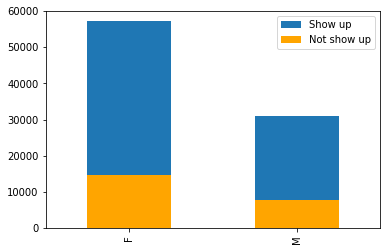

In [46]:
plot_variable_counts(df.Gender,show, n_show)

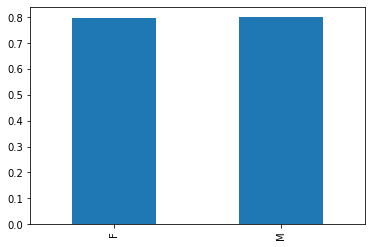

In [47]:
plot_probability(df.Gender,show)

Notes : <br>The most of patients are woman <br>Men are lightly more susceptible to show up their appointment 

In [48]:
df.head(0)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show_up


##### Investigate the dates

First I will create a delay time column

In [49]:
df['time_delay'] = df['AppointmentDay'] - df['ScheduledDay'] # create time delay column
df['delay'] = df.time_delay.dt.days                          # create a delay column as with integer type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null float64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No_show_up        110527 non-null object
time_delay        110527 non-null timedelta64[ns]
delay             110527 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(7), object(3), timedelta64[ns](1)
memory usage: 11.8+ MB


In [50]:
df.No_show_up[show].unique()

array(['No'], dtype=object)

In [58]:
df.plot(x='ScheduledDay', y='delay', kind='scatter', figsize=(15,6) );

ValueError: scatter requires x column to be numeric

Note 

The time delay is decreasing until june 2016 there the delay is 0

The scheduled day

In [93]:
df['Scheduled_month'] = pd.DatetimeIndex(df['ScheduledDay']).month
df['Scheduled_year'] = pd.DatetimeIndex(df['ScheduledDay']).year
df['Scheduled_day_of_week'] = df['ScheduledDay'].dt.day_name()
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,...,No_show_up,time_delay,delay,Scheduled_month,Scheduled_year,Scheduled_day_of_week,Appointment_month,Appointment_year,Appointment_day_of_week,age_range
0,F,2016-04-29,2016-04-29,62.0,JARDIM DA PENHA,0,1,0,0,0,...,No,0 days,0,4,2016,Friday,4,2016,Friday,60-69
1,M,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0,0,0,0,0,...,No,0 days,0,4,2016,Friday,4,2016,Friday,50-59
2,F,2016-04-29,2016-04-29,62.0,MATA DA PRAIA,0,0,0,0,0,...,No,0 days,0,4,2016,Friday,4,2016,Friday,60-69
3,F,2016-04-29,2016-04-29,8.0,PONTAL DE CAMBURI,0,0,0,0,0,...,No,0 days,0,4,2016,Friday,4,2016,Friday,0-19
4,F,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0,1,1,0,0,...,No,0 days,0,4,2016,Friday,4,2016,Friday,50-59


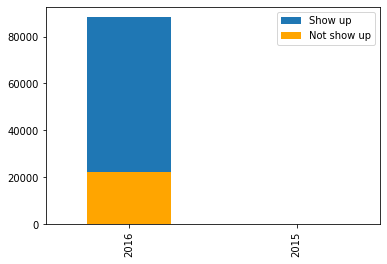

In [61]:
plot_variable_counts(df.Scheduled_year,show, n_show)

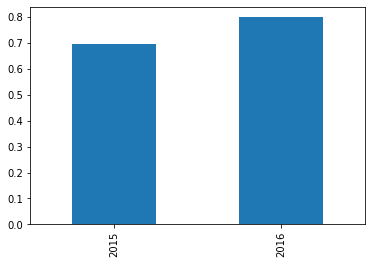

In [62]:
plot_probability(df.Scheduled_year,show)

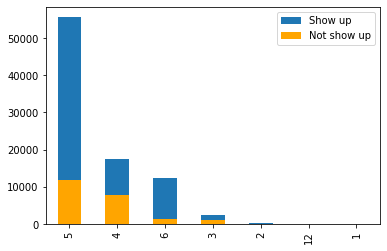

In [63]:
plot_variable_counts(df.Scheduled_month,show, n_show)

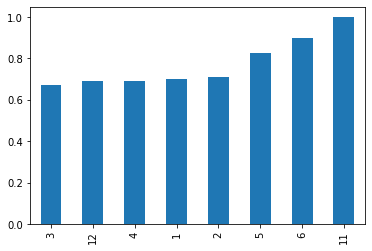

In [64]:
plot_probability(df.Scheduled_month,show)

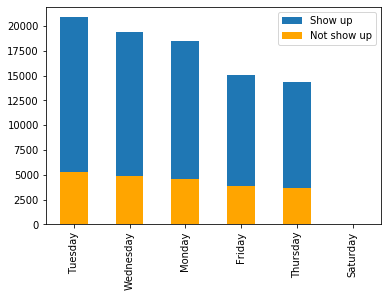

In [65]:
plot_variable_counts(df.Scheduled_day_of_week,show, n_show)

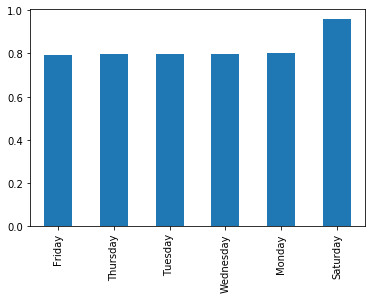

In [66]:
plot_probability(df.Scheduled_day_of_week,show)

The appointment day

In [67]:
df['Appointment_month'] = pd.DatetimeIndex(df['AppointmentDay']).month
df['Appointment_year'] = pd.DatetimeIndex(df['AppointmentDay']).year
df['Appointment_day_of_week'] = df['AppointmentDay'].dt.day_name()


The year

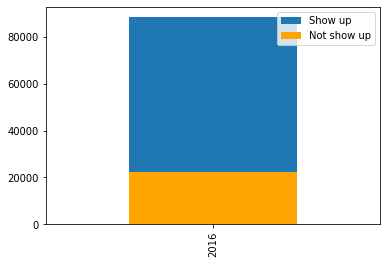

In [68]:
plot_variable_counts(df.Appointment_year,show, n_show)

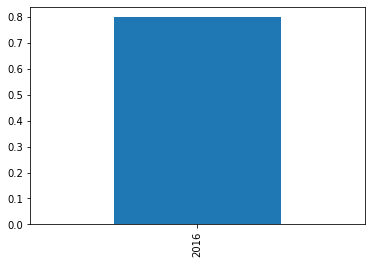

In [69]:
plot_probability(df.Appointment_year,show)

Note: <br>The probability of showing up is near 80%

The month

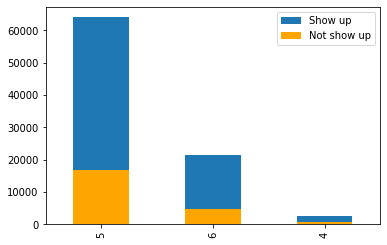

In [70]:
plot_variable_counts(df.Appointment_month,show, n_show)


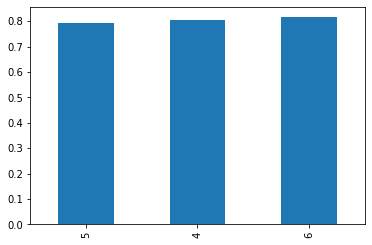

In [71]:
plot_probability(df.Appointment_month,show)


Notes:<br>
The probability is almost the same for the three months of appointment <br>
The month investigation is not very usefull because it's token from one year ( there is no repetitive months)<br>
All the appointment are concentred on those three months wich is strange

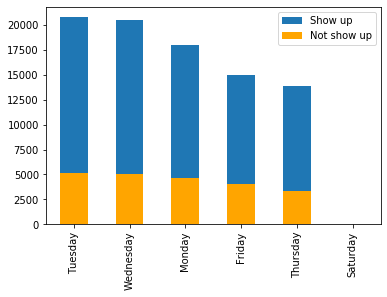

In [72]:
plot_variable_counts(df.Appointment_day_of_week,show, n_show)

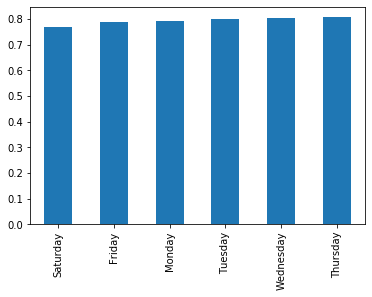

In [73]:
plot_probability(df.Appointment_day_of_week,show)

Note :<br>
The probability of showing up is the same for each day, except Saturday wich is a weekend and it doesn't includes an important population

##### The age

In [74]:
bins = [0,18, 30, 40, 50, 60, 70,80,90,100, 120]
labels = ['0-19','20-29', '30-39', '40-49', '50-59', '60-69', '70-79','80-89','90-99','100+']
df['age_range'] = pd.cut(df.Age, bins, labels = labels,include_lowest = True)

df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,...,No_show_up,time_delay,delay,Scheduled_month,Scheduled_year,Scheduled_day_of_week,Appointment_month,Appointment_year,Appointment_day_of_week,age_range
0,F,2016-04-29,2016-04-29,62.0,JARDIM DA PENHA,0,1,0,0,0,...,No,0 days,0,4,2016,Friday,4,2016,Friday,60-69
1,M,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0,0,0,0,0,...,No,0 days,0,4,2016,Friday,4,2016,Friday,50-59
2,F,2016-04-29,2016-04-29,62.0,MATA DA PRAIA,0,0,0,0,0,...,No,0 days,0,4,2016,Friday,4,2016,Friday,60-69
3,F,2016-04-29,2016-04-29,8.0,PONTAL DE CAMBURI,0,0,0,0,0,...,No,0 days,0,4,2016,Friday,4,2016,Friday,0-19
4,F,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0,1,1,0,0,...,No,0 days,0,4,2016,Friday,4,2016,Friday,50-59


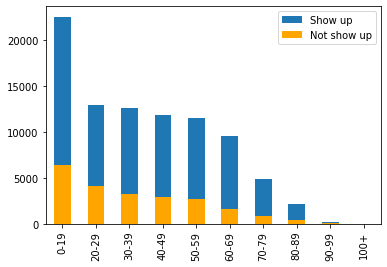

In [75]:
plot_variable_counts(df.age_range,show, n_show)

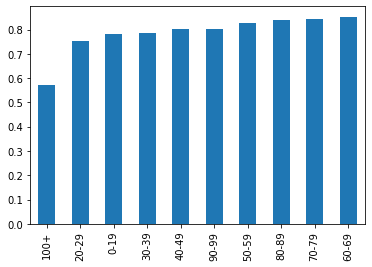

In [76]:
plot_probability(df.age_range,show)

Note: <br>
Except very old people (100+), old people are more susceptible to show up

In [77]:
df[n_show].head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,...,No_show_up,time_delay,delay,Scheduled_month,Scheduled_year,Scheduled_day_of_week,Appointment_month,Appointment_year,Appointment_day_of_week,age_range
6,F,2016-04-27,2016-04-29,23.0,GOIABEIRAS,0,0,0,0,0,...,Yes,2 days,2,4,2016,Wednesday,4,2016,Friday,20-29
7,F,2016-04-27,2016-04-29,39.0,GOIABEIRAS,0,0,0,0,0,...,Yes,2 days,2,4,2016,Wednesday,4,2016,Friday,30-39
11,M,2016-04-26,2016-04-29,29.0,NOVA PALESTINA,0,0,0,0,0,...,Yes,3 days,3,4,2016,Tuesday,4,2016,Friday,20-29
17,F,2016-04-28,2016-04-29,40.0,CONQUISTA,1,0,0,0,0,...,Yes,1 days,1,4,2016,Thursday,4,2016,Friday,30-39
20,F,2016-04-27,2016-04-29,30.0,NOVA PALESTINA,0,0,0,0,0,...,Yes,2 days,2,4,2016,Wednesday,4,2016,Friday,20-29


##### The Neighbourhood

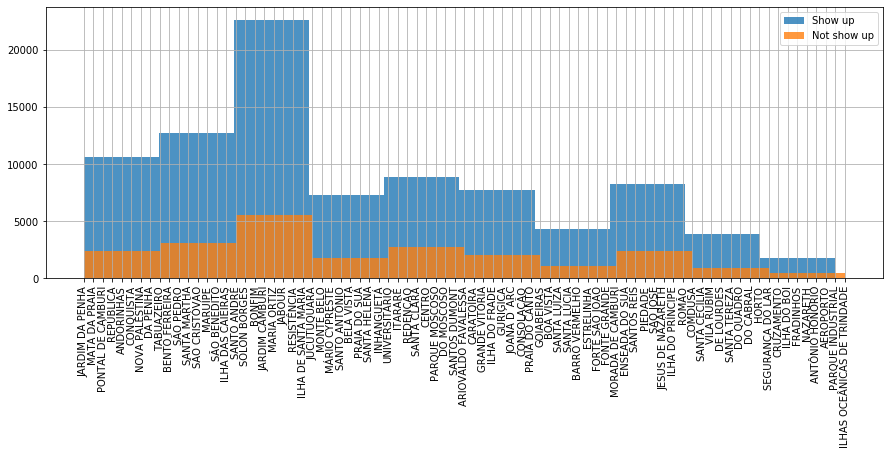

In [94]:
#plot_variable_counts(df.Neighbourhood,show, n_show)
plt.xticks(rotation=90)
df.Neighbourhood[show].hist(alpha=0.8, label='Show up', figsize=(15,5))
df.Neighbourhood[n_show].hist(alpha=0.8, label='Not show up', figsize=(15,5))
plt.legend();

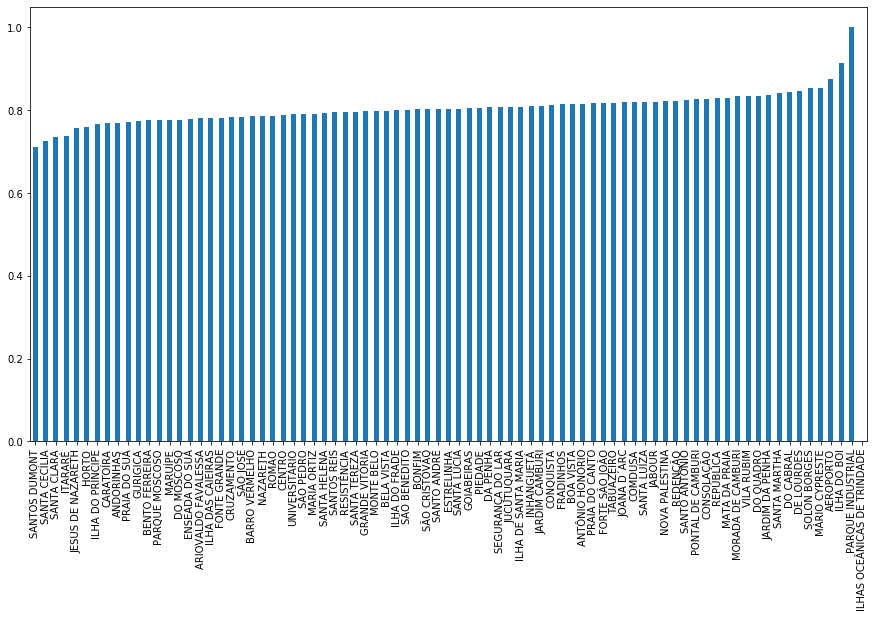

In [79]:
#plot_probability(df.Neighbourhood,show)
probability_Neighbourhood = df.Neighbourhood[show].value_counts()/df.Neighbourhood.value_counts()
probability_Neighbourhood.sort_values().plot(kind='bar', figsize=(15,8));

Note: <br>I think the neighbourhood factor can help for prediction if we combine it with other factors (wich I will not do in this investigation, maybe I'll do it in the future)

##### The Scholarship

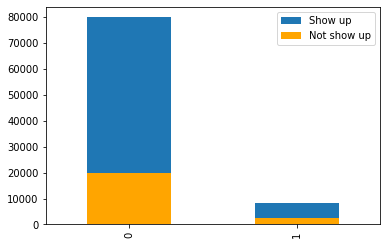

In [80]:
plot_variable_counts(df.Scholarship,show, n_show)

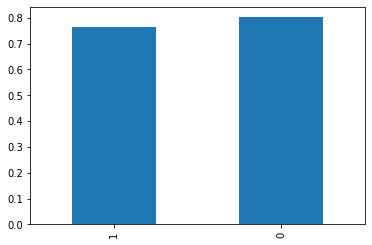

In [81]:
plot_probability(df.Scholarship,show)

Note: <br>The showing up is more probable for the non scholarship case 

##### The Hipertension

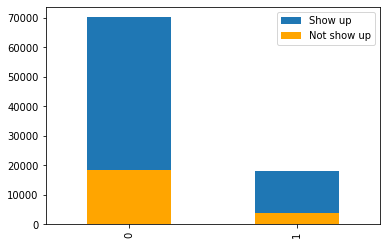

In [82]:
plot_variable_counts(df.Hipertension,show, n_show)

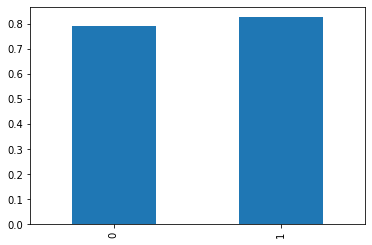

In [83]:
plot_probability(df.Hipertension,show)

##### The Diabetes

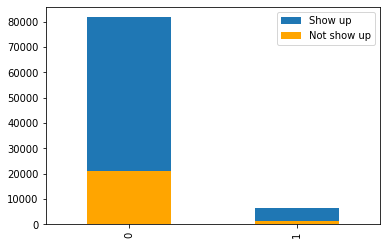

In [84]:
plot_variable_counts(df.Diabetes,show, n_show)

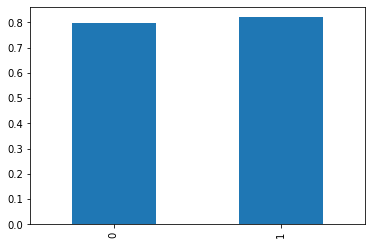

In [85]:
plot_probability(df.Diabetes,show)

##### The Alcoholism

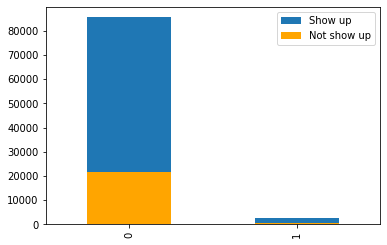

In [86]:
plot_variable_counts(df.Alcoholism,show, n_show)

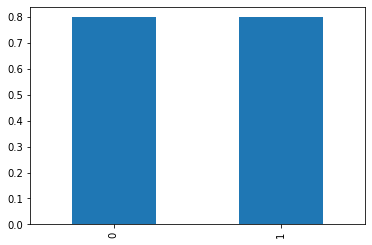

In [87]:
plot_probability(df.Alcoholism,show)

Note: 
<br>For the hipertension, diabetes, alcoholism and  handcap factors individualy don't have a big influence on the probability of showing up (maybe in combinaison with other factors can give more result)

##### The Handcap

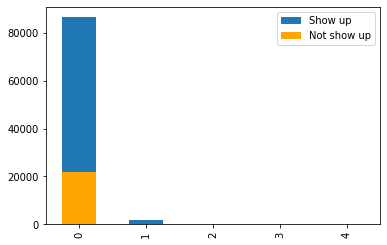

In [88]:
plot_variable_counts(df.Handcap,show, n_show)

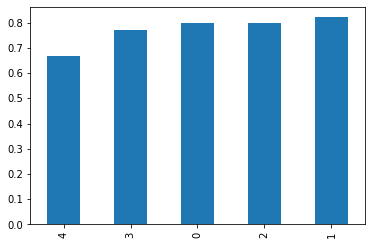

In [89]:
plot_probability(df.Handcap,show)

Note: <br>For this factor we have a miss a description, we don't know if those numbers represent a level of handcap or a type of handcap. Anyway, we have the probability is high for number 1 and low for number 4 comparing to 0, 2 and 3.

##### The SMS_received

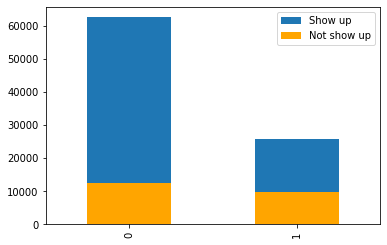

In [90]:
plot_variable_counts(df.SMS_received,show, n_show)

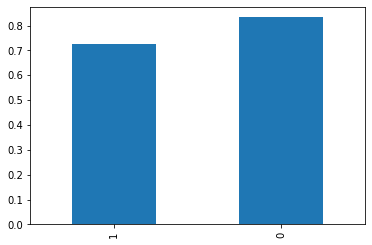

In [91]:
plot_probability(df.SMS_received,show)

Note: <br>Here when the Sms is received the probability is low ( wich is strange !!! ) 

# Conclusion 

According to my investigation there is no way to predict efficiently if a patient will show up or not.

To answer to the main question wich asks to determine the most important feature to predict if a patient will show up or not: <br> Except the PatientId and the AppointmentID, each feature can lightly help to do the prediction (but with a very low accuracy)

## Limitation

The investigation can be improved by combining some factors or by using advanced statistical analysis methods, wich I didn't do due to limit of time and skills.

The dataset is very limited ( in term of factor and also in quantitty of data) and this fact doesn't allow us to make a powerfull investigation.